In [17]:
# 1. Import Libraries and Load Data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




In [19]:
# Load the dataset
df = pd.read_csv('academic_achievement_cleaned.csv')
df

,Student_ID,Weekly_Study_Hours,Student_Age_encoded,Sex_encoded,High_School_Type_encoded,Scholarship_encoded,Additional_Work_encoded,Sports_activity_encoded,Transportation_encoded,Attendance_encoded,Reading_encoded,Notes_encoded,Listening_in_Class_encoded,Project_work_encoded,Grade_encoded
0,STUDENT1,0,1,1,0,2,1,0,1,1,1,2,1,0,0
1,STUDENT2,0,1,1,0,2,1,0,1,1,1,1,2,1,0
2,STUDENT3,2,1,1,2,2,0,0,1,2,0,1,1,1,0
3,STUDENT4,2,0,0,1,2,1,0,0,1,0,2,1,0,0
4,STUDENT5,12,1,1,1,2,0,0,0,1,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,0,1,0,2,2,1,1,1,1,0,2,1,1,4
141,STUDENT142,0,0,0,2,3,0,0,1,2,0,2,2,0,4
142,STUDENT143,0,0,0,1,3,0,0,1,1,1,1,1,0,0
143,STUDENT144,12,1,0,2,3,1,1,0,3,0,2,1,1,3


In [20]:
# Remove unnamed columns if any
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


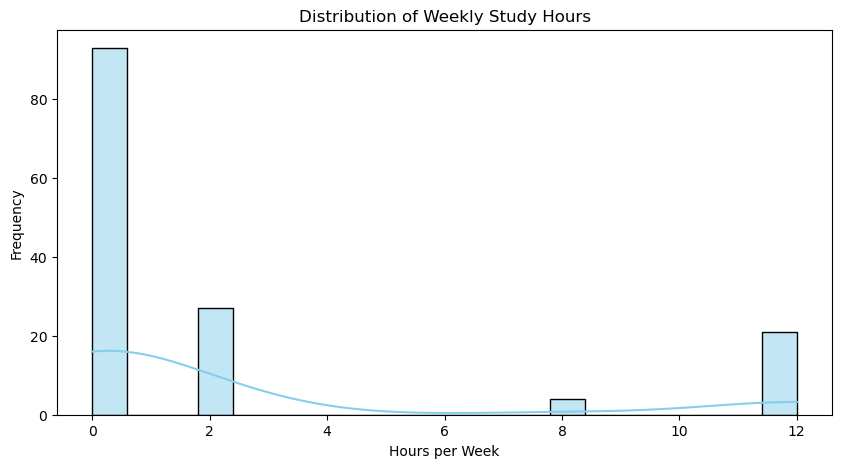

In [21]:
 # 2. Weekly Study Hours Distribution

plt.figure(figsize=(10,5))
sns.histplot(df['Weekly_Study_Hours'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Weekly Study Hours')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


Interpretation: This plot shows how many students study for how many hours per week. A left-skew might indicate many students study very little, while a right-skew suggests high study effort.



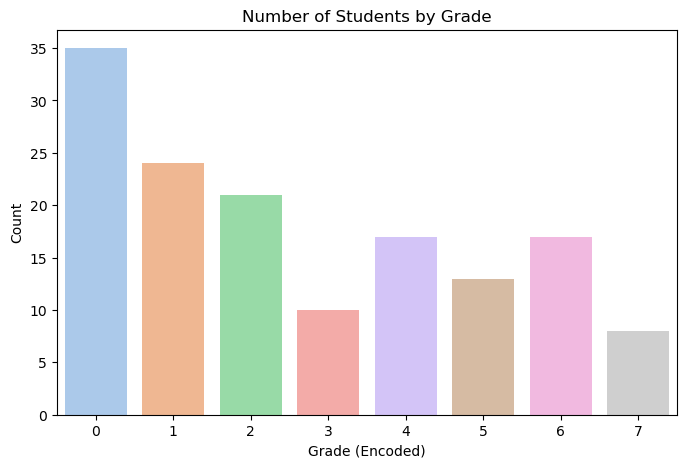

In [22]:
# 3. Count of Students per Grade

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Grade_encoded', palette='pastel')
plt.title('Number of Students by Grade')
plt.xlabel('Grade (Encoded)')
plt.ylabel('Count')
plt.show()

Interpretation: Shows how many students received each grade. Useful to see grade distribution (e.g., are most students getting average scores?).




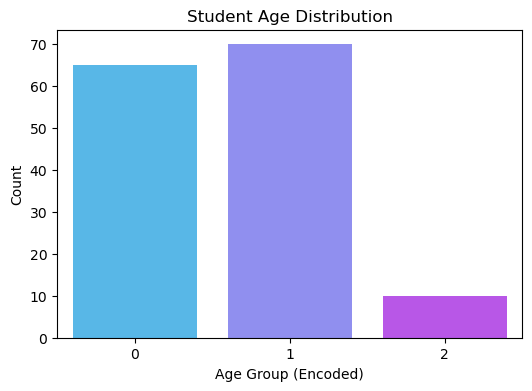

In [23]:
  # 4. Student Age Distribution

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Student_Age_encoded', palette='cool')
plt.title('Student Age Distribution')
plt.xlabel('Age Group (Encoded)')
plt.ylabel('Count')
plt.show()

Interpretation: Understands which age ranges are most common among students. Can help identify if age impacts performance later.



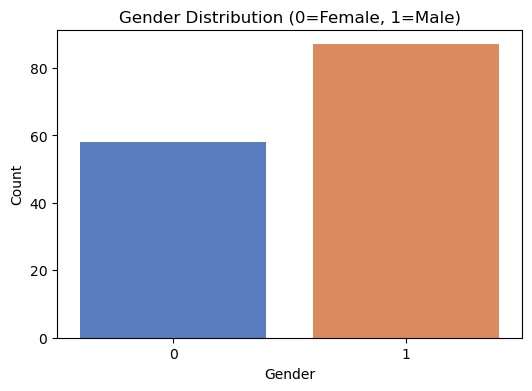

In [24]:
# 5. Gender Distribution

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex_encoded', palette='muted')
plt.title('Gender Distribution (0=Female, 1=Male)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Interpretation: Highlights the gender ratio in your dataset. Useful for ensuring there's no gender imbalance.



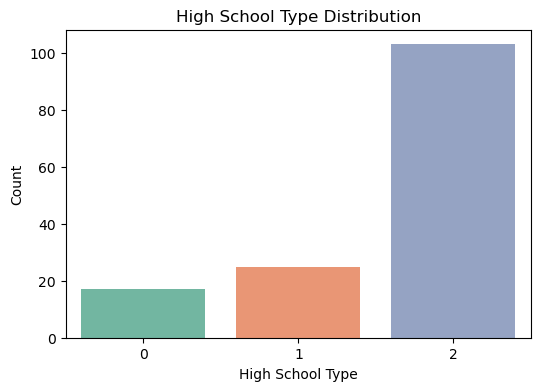

In [25]:
# 6. High School Type Distribution

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='High_School_Type_encoded', palette='Set2')
plt.title('High School Type Distribution')
plt.xlabel('High School Type')
plt.ylabel('Count')
plt.show()


Interpretation: Tells you how many students come from state, private, or other high schools. This can be later linked to grades.



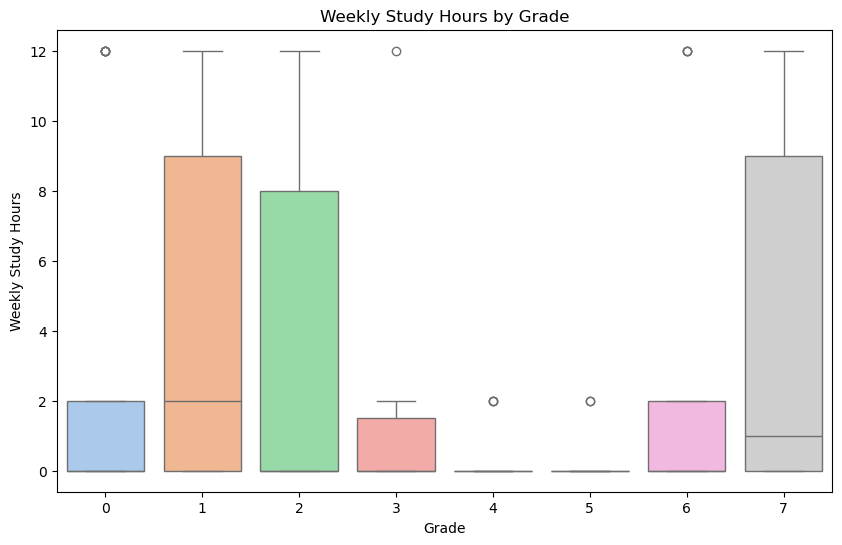

In [26]:
 # 7. Boxplot: Study Hours vs Grade

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Grade_encoded', y='Weekly_Study_Hours', palette='pastel')
plt.title('Weekly Study Hours by Grade')
plt.xlabel('Grade')
plt.ylabel('Weekly Study Hours')
plt.show()

Interpretation: Shows how study hours vary across different grades. Helps identify if more study correlates with higher grades.



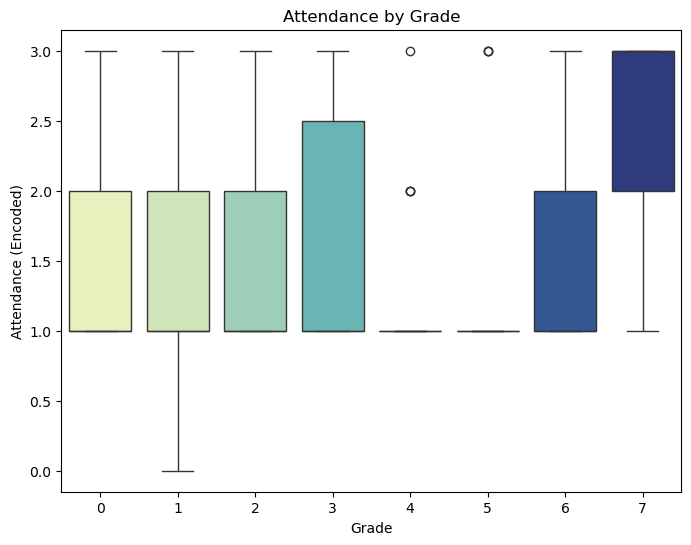

In [27]:
 # 8. Boxplot: Attendance vs Grade

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Grade_encoded', y='Attendance_encoded', palette='YlGnBu')
plt.title('Attendance by Grade')
plt.xlabel('Grade')
plt.ylabel('Attendance (Encoded)')
plt.show()


Interpretation: Examines if students with better attendance tend to score higher grades. Look for rising medians as grades improve.



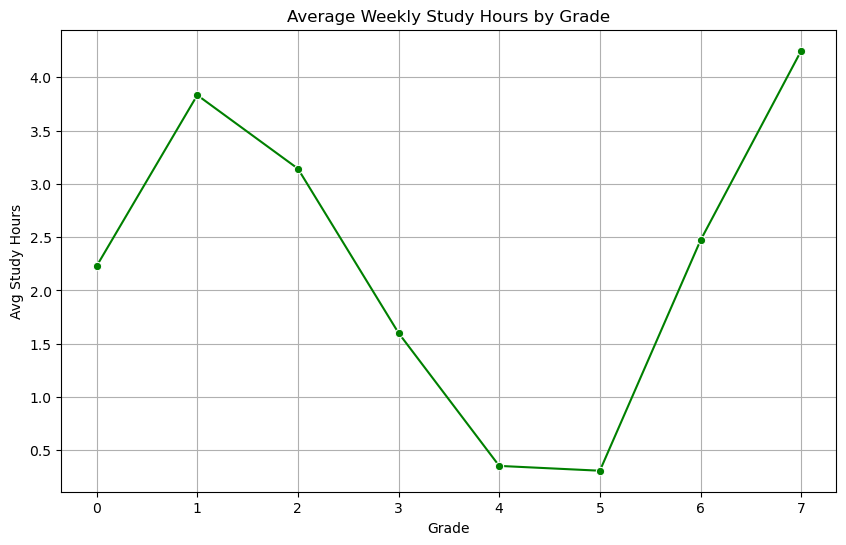

In [28]:
# 9. Average Weekly Study Hours by Grade

avg_study = df.groupby('Grade_encoded')['Weekly_Study_Hours'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_study, x='Grade_encoded', y='Weekly_Study_Hours', marker='o', color='green')
plt.title('Average Weekly Study Hours by Grade')
plt.xlabel('Grade')
plt.ylabel('Avg Study Hours')
plt.grid(True)
plt.show()


 Interpretation: A line plot to clearly show how average study time changes with grade. A rising line suggests higher grades need more hours.

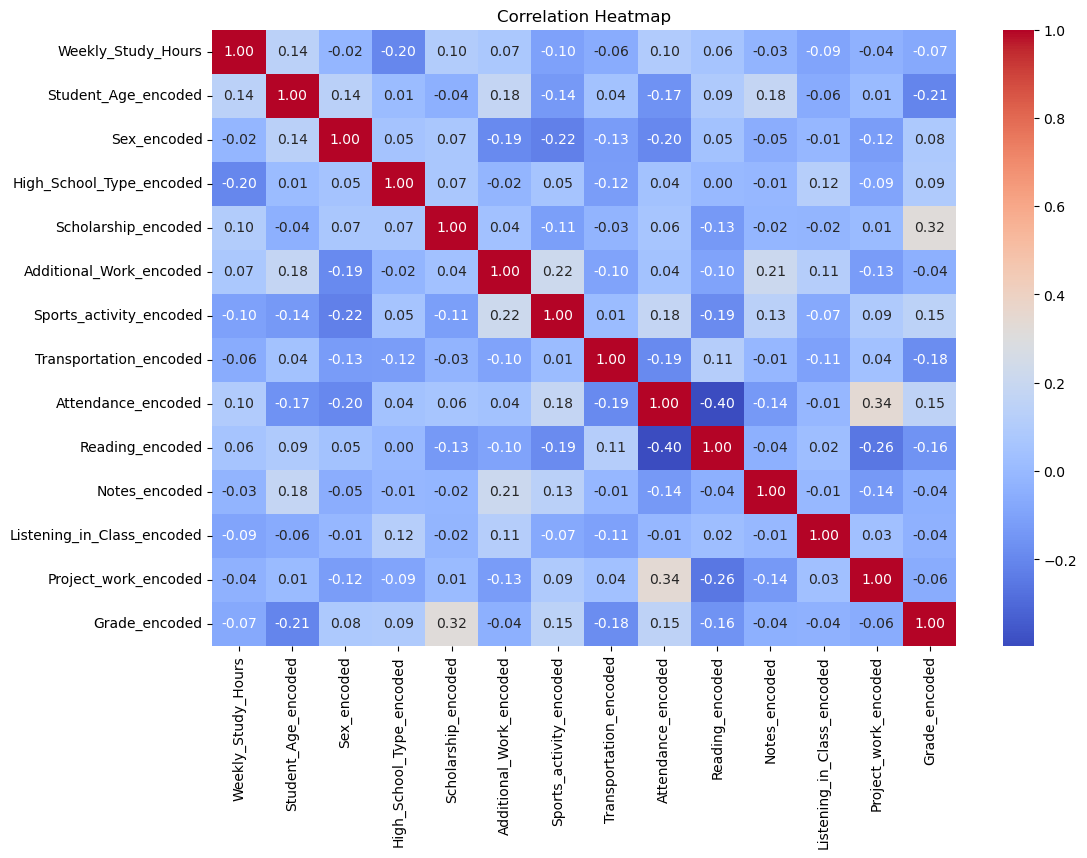

In [29]:
# 10. Correlation Heatmap (Numerical Columns)

plt.figure(figsize=(12,8))
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

 Interpretation: Finds the strongest relationships between features like attendance, study hours, and grades. Higher positive values (closer to 1) indicate stronger correlation.



In [30]:
# 11. Feature Engineering – Extra Columns

# Total Engagement Score: Based on participation
df['Total_Activity_Score'] = (
    df['Sports_activity_encoded'] +
    df['Reading_encoded'] +
    df['Notes_encoded'] +
    df['Listening_in_Class_encoded'] +
    df['Project_work_encoded']
)

# Engagement Index = Study Hours × Attendance
df['Engagement_Index'] = df['Weekly_Study_Hours'] * df['Attendance_encoded']

# Binary flag: students who don't study
df['No_Study'] = (df['Weekly_Study_Hours'] == 0).astype(int)

# Flag high vs low attendance
df['Attendance_Level'] = pd.cut(df['Attendance_encoded'], bins=[-1, 1, 3], labels=['Low', 'High'])

# Preview
df.head()


,Student_ID,Weekly_Study_Hours,Student_Age_encoded,Sex_encoded,High_School_Type_encoded,Scholarship_encoded,Additional_Work_encoded,Sports_activity_encoded,Transportation_encoded,Attendance_encoded,Reading_encoded,Notes_encoded,Listening_in_Class_encoded,Project_work_encoded,Grade_encoded,Total_Activity_Score,Engagement_Index,No_Study,Attendance_Level
0,STUDENT1,0,1,1,0,2,1,0,1,1,1,2,1,0,0,4,0,1,Low
1,STUDENT2,0,1,1,0,2,1,0,1,1,1,1,2,1,0,5,0,1,Low
2,STUDENT3,2,1,1,2,2,0,0,1,2,0,1,1,1,0,3,4,0,High
3,STUDENT4,2,0,0,1,2,1,0,0,1,0,2,1,0,0,3,2,0,Low
4,STUDENT5,12,1,1,1,2,0,0,0,1,1,1,2,1,0,5,12,0,Low



 Interpretation:

Total_Activity_Score tells how engaged a student is in class-related tasks.

Engagement_Index captures combined study effort and attendance.

No_Study helps identify disengaged students.

Attendance_Level simplifies analysis into high vs low attendance.



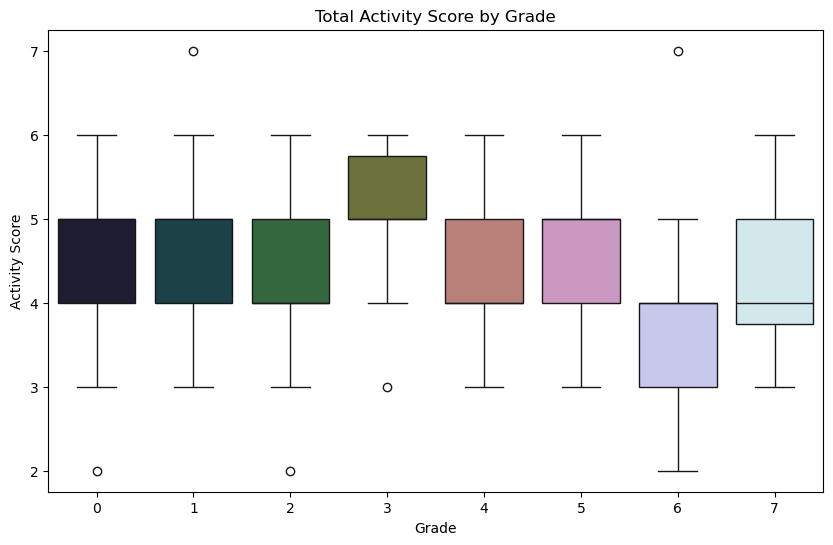

In [31]:
# 12. Visualizing Extra Columns
# a. Total Activity Score by Grade

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Grade_encoded', y='Total_Activity_Score', palette='cubehelix')
plt.title('Total Activity Score by Grade')
plt.xlabel('Grade')
plt.ylabel('Activity Score')
plt.show()

Interpretation: Shows if active students (those doing reading, notes, etc.) tend to get better grades.



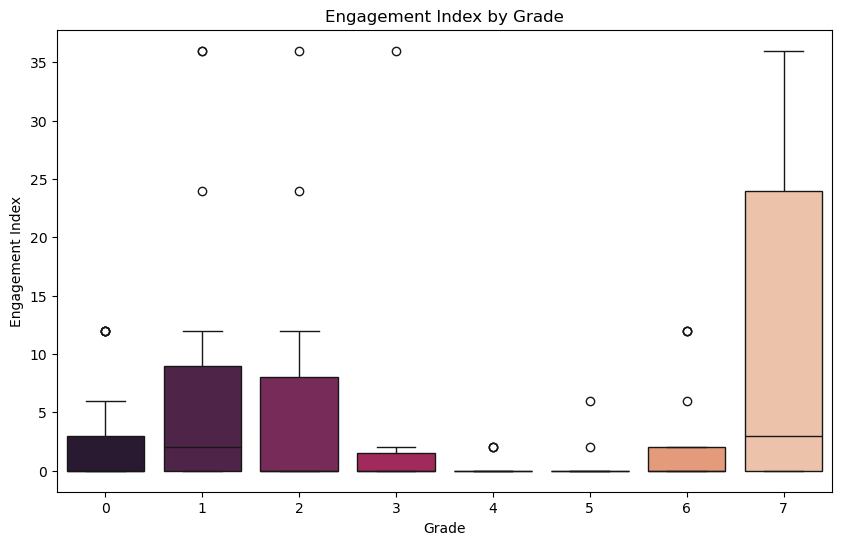

In [32]:
# b. Engagement Index vs Grade

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Grade_encoded', y='Engagement_Index', palette='rocket')
plt.title('Engagement Index by Grade')
plt.xlabel('Grade')
plt.ylabel('Engagement Index')
plt.show()

Interpretation: Identifies whether students who study more and attend regularly score higher.



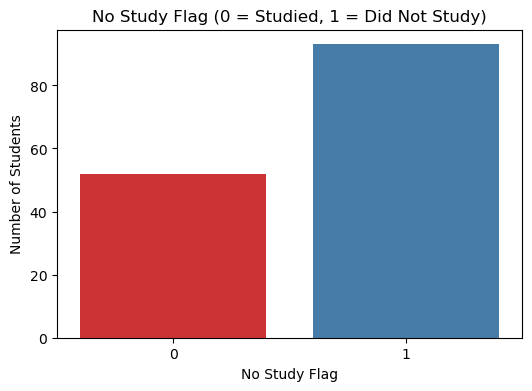

In [33]:
# c. No Study Flag Distribution

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='No_Study', palette='Set1')
plt.title('No Study Flag (0 = Studied, 1 = Did Not Study)')
plt.xlabel('No Study Flag')
plt.ylabel('Number of Students')
plt.show()


Interpretation: Shows how many students didn’t study at all. You could correlate this with low grades.

